<a href="https://colab.research.google.com/github/Arwa678/IT326-Group-3/blob/main/Phase1_and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the project
In our project, we chose the **Heart Health dataset** because heart disease is one of the leading causes of death worldwide.
Understanding the factors that contribute to heart disease is crucial for prevention. The dataset provides important information such as
age, gender, blood pressure, cholesterol levels, and other health-related factors which are key indicators of heart health.

By analyzing this data, we hope to identify patterns and risk factors that can help predict heart disease.
This could be valuable for healthcare professionals in developing strategies to prevent heart disease and improve patient care.
Our goal is to contribute to better heart health by using data to spot trends and offer insights into managing heart disease risk.

## Dataset Source:
The Heart Health dataset is provided for research and analysis to better understand the risk factors contributing to heart disease.

link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

## Goal:
The goal of this dataset is to predict the likelihood of a heart attack based on various health metrics, including blood pressure, cholesterol, glucose levels# smoking habits, and exercise patterns. This analysis will aid in early detection and prevention strategies for heart disease.

## Class label
The class label "HadHeartAttack" is a binary variable indicating whether a respondent has experienced a heart attack. It is categorized as "Yes" if the respondent had heart disease and "No" if the respondent did not have heart disease. This label is crucial for classification tasks aimed at identifying individuals at risk of heart disease.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('/content/heart_2022_with_nans.csv')
df1 = pd.DataFrame(df)
print(df1)

                 State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 0.0   
1              Alabama  Female     Excellent                 0.0   
2              Alabama  Female     Very good                 2.0   
3              Alabama  Female     Excellent                 0.0   
4              Alabama  Female          Fair                 2.0   
...                ...     ...           ...                 ...   
445127  Virgin Islands  Female          Good                 0.0   
445128  Virgin Islands  Female     Excellent                 2.0   
445129  Virgin Islands  Female          Poor                30.0   
445130  Virgin Islands    Male     Very good                 0.0   
445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0 

In [ ]:
class_label = df['HadHeartAttack']
df = df.drop(columns=['HadHeartAttack'])
df['HadHeartAttack'] = class_label

the code bellow shows the types of each attribute

In [ ]:
print(df.dtypes)

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                     object
R

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadAngina                  440727 non-null  object 
 10  HadStroke                  443575 non-null  object 
 11  HadAsthma                  443359 non-null  object 
 12  HadSkinCancer              441989 non-null  object 
 13  HadCOPD                    44

the code below lists all the attributes of the dataset

In [ ]:
col_name = df.columns
print(col_name)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')


our dataset contains 445132 samples and 40 attributes

In [ ]:
col = df.columns
print('Number of attributes :',len(col))

Number of attributes : 40


In [ ]:
num_of_rows = len(df)
print('Number of rows :',num_of_rows)

Number of rows : 445132


---
---
#Phase 2


#Sampling
We took a balanced dataset where the class label values were distributed within 40% and 60%.

In [ ]:
# Check initial class distribution
print("Original class distribution:\n", df['HadHeartAttack'].value_counts())

# Set desired total sample size and calculate required samples for each class
total_sample_size = 30000  # Desired sample size
HadHeartAttack_1_sample_size = int(total_sample_size * 0.4)  # 40% for HadHeartAttack = yes
HadHeartAttack_0_sample_size = total_sample_size - HadHeartAttack_1_sample_size  # 60% for HadHeartAttack = 0

# Check if there are enough rows for each class
if df[df['HadHeartAttack'] == 'Yes'].shape[0] < HadHeartAttack_1_sample_size:
    HadHeartAttack_1_sample_size = df[df['HadHeartAttack'] == 'Yes'].shape[0]
if df[df['HadHeartAttack'] == 'No'].shape[0] < HadHeartAttack_0_sample_size:
    HadHeartAttack_0_sample_size = df[df['HadHeartAttack'] == 'No'].shape[0]

# Sample from each class
balanced_sample = pd.concat([
    df[df['HadHeartAttack'] == 'Yes'].sample(HadHeartAttack_1_sample_size, replace=True, random_state=42),
    df[df['HadHeartAttack'] =='No'].sample(HadHeartAttack_0_sample_size, replace=True, random_state=42)
])

# Verify the balanced sample distribution
print("Balanced sample class distribution:\n", balanced_sample['HadHeartAttack'].value_counts())

print(balanced_sample)

Original class distribution:
 HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64
Balanced sample class distribution:
 HadHeartAttack
No     18000
Yes    12000
Name: count, dtype: int64
                State     Sex GeneralHealth  PhysicalHealthDays  \
418923  West Virginia    Male          Fair                24.0   
283046   North Dakota  Female     Very good                 0.0   
12937         Arizona    Male     Very good                 0.0   
95486           Idaho    Male     Very good                 0.0   
379670       Virginia  Female          Fair                30.0   
...               ...     ...           ...                 ...   
34786      California    Male          Good                 0.0   
289828           Ohio  Female          Good                 3.0   
43343        Colorado  Female     Very good                 0.0   
308861         Oregon  Female          Fair                25.0   
179459  Massachusetts    Male     Very good                 

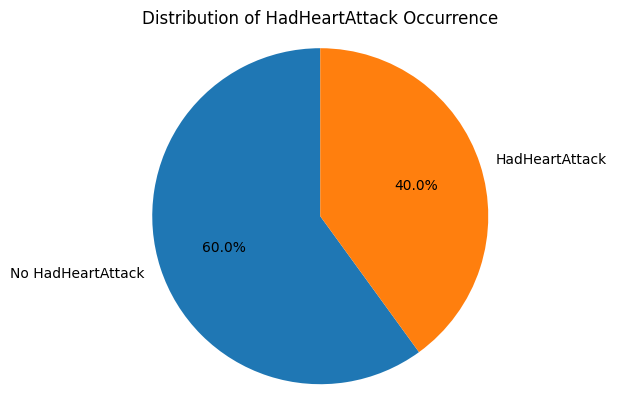

In [ ]:
# Count the number of instances for each class
HadHeartAttack_counts = balanced_sample['HadHeartAttack'].value_counts()

# Create a pie chart
plt.pie(HadHeartAttack_counts, labels=['No HadHeartAttack', 'HadHeartAttack'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of HadHeartAttack Occurrence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie chart represents the distribution of occurrences of "HadHeartAttack." The chart is divided into two segments

The orange segment represents the portion of individuals who had a heart attack, making up 40% of the total population in the dataset.
The blue segment represents the portion of individuals who did not have a heart attack, comprising 60% of the population.
The chart visually shows that a larger percentage of people did not experience a heart attack compared to those who did.

##Remove Duplicates

To make sure there are no duplicate rows in the data, which is regarded as a process of cleaning the data.

In [ ]:
# remove duplicates row
balanced_sample= balanced_sample.drop_duplicates()

print("DataFrame after removing duplicates:")
print(balanced_sample)

DataFrame after removing duplicates:
                State     Sex GeneralHealth  PhysicalHealthDays  \
418923  West Virginia    Male          Fair                24.0   
283046   North Dakota  Female     Very good                 0.0   
12937         Arizona    Male     Very good                 0.0   
95486           Idaho    Male     Very good                 0.0   
379670       Virginia  Female          Fair                30.0   
...               ...     ...           ...                 ...   
34786      California    Male          Good                 0.0   
289828           Ohio  Female          Good                 3.0   
43343        Colorado  Female     Very good                 0.0   
308861         Oregon  Female          Fair                25.0   
179459  Massachusetts    Male     Very good                 NaN   

        MentalHealthDays                                    LastCheckupTime  \
418923               0.0  Within past year (anytime less than 12 months ...   


#Visualizations graphs

##1. Bar Charts for Categorical Features

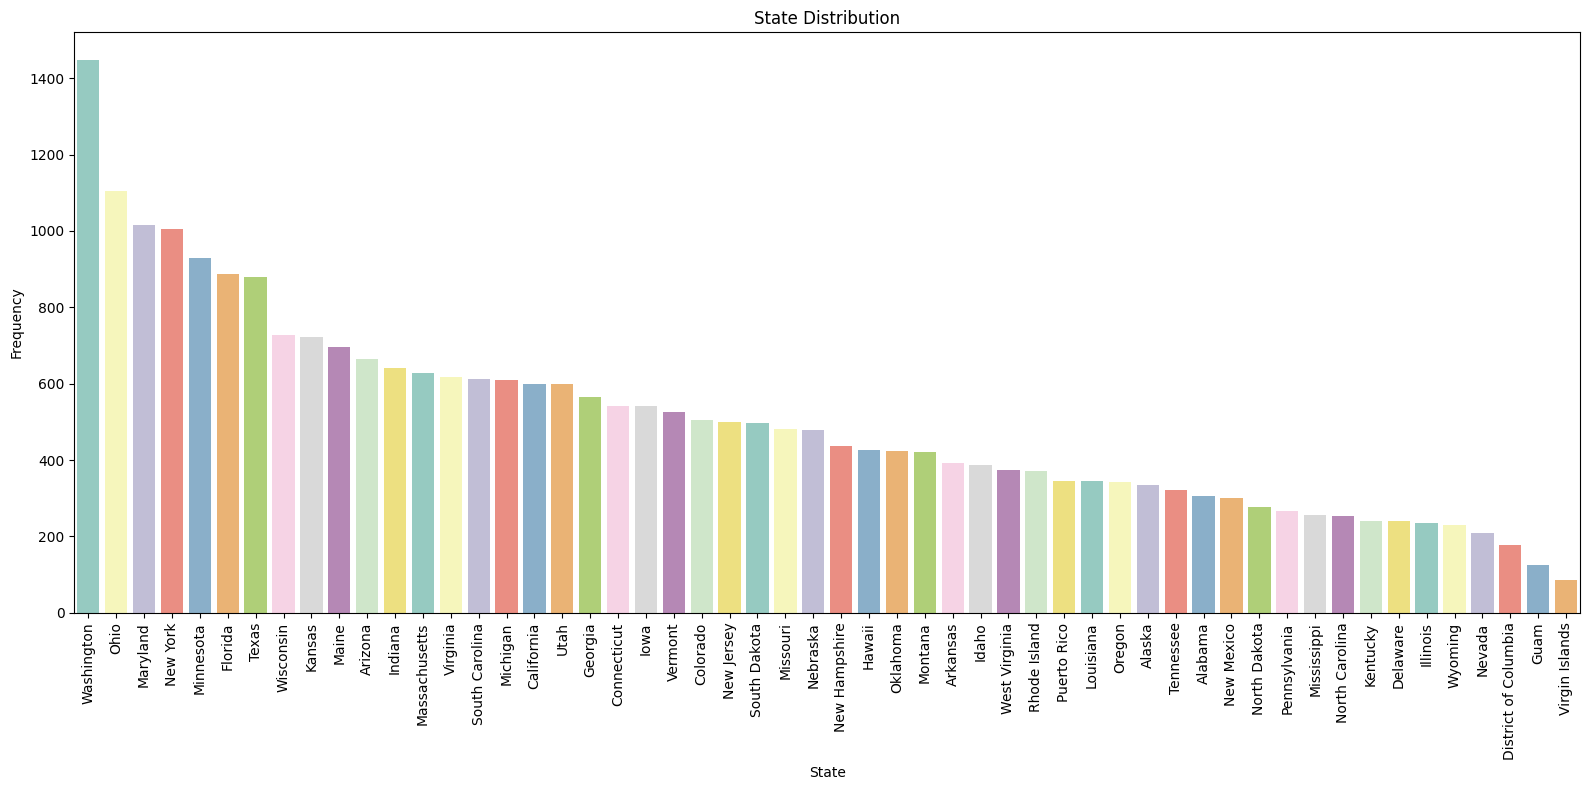

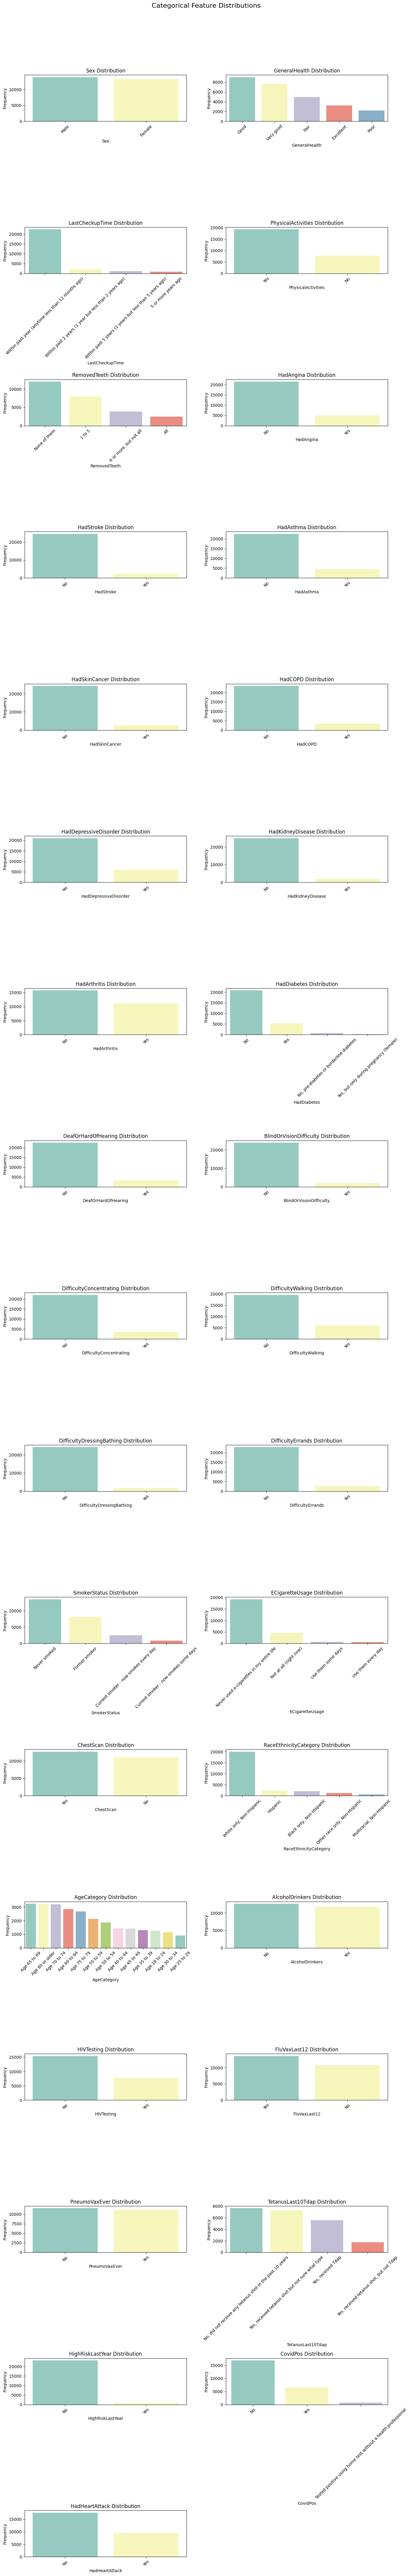

In [ ]:
# Separate categorical and numerical columns
categorical_cols = balanced_sample.select_dtypes(include=['object']).columns
numerical_cols = balanced_sample.select_dtypes(exclude=['object']).columns

# Special Plot for "State Distribution" for better readability
plt.figure(figsize=(16, 8))
sns.countplot(data=balanced_sample, x='State', order=balanced_sample['State'].value_counts().index, palette='Set3')
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.tight_layout()
plt.show()

# 1. Bar Charts for Remaining Categorical Features with 'Set3' palette
# Remove "State" from categorical columns to avoid plotting it again
remaining_categorical_cols = categorical_cols.drop('State')
num_cats = len(remaining_categorical_cols)
rows = (num_cats // 2) + (num_cats % 2 > 0)  # 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))
fig.suptitle('Categorical Feature Distributions', fontsize=16, y=1.02)
axes = axes.flatten()

for i, col in enumerate(remaining_categorical_cols):
    sns.countplot(data=balanced_sample, x=col, order=balanced_sample[col].value_counts().index, palette='Set3', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**State Distribution:** The distribution of states varies significantly, with a few states (e.g., Washington, Ohio, Maryland, New York, Minnesota) showing high frequencies, while others (e.g., Guam, Virgin Islands, District of Columbia) have low representation. The chart is right-skewed, indicating that a small number of states have much higher counts than the rest.

**Categorical Feature Distributions:** The categorical features display distinct patterns, with some categories consistently more common. Binary features (like 'Yes' vs. 'No') often show one dominant response. Some features have balanced distributions, while others are heavily skewed. Observing the most frequent categories reveals key characteristics of the dataset, suggesting trends or tendencies within specific features.

##2. Histograms for Numerical Features


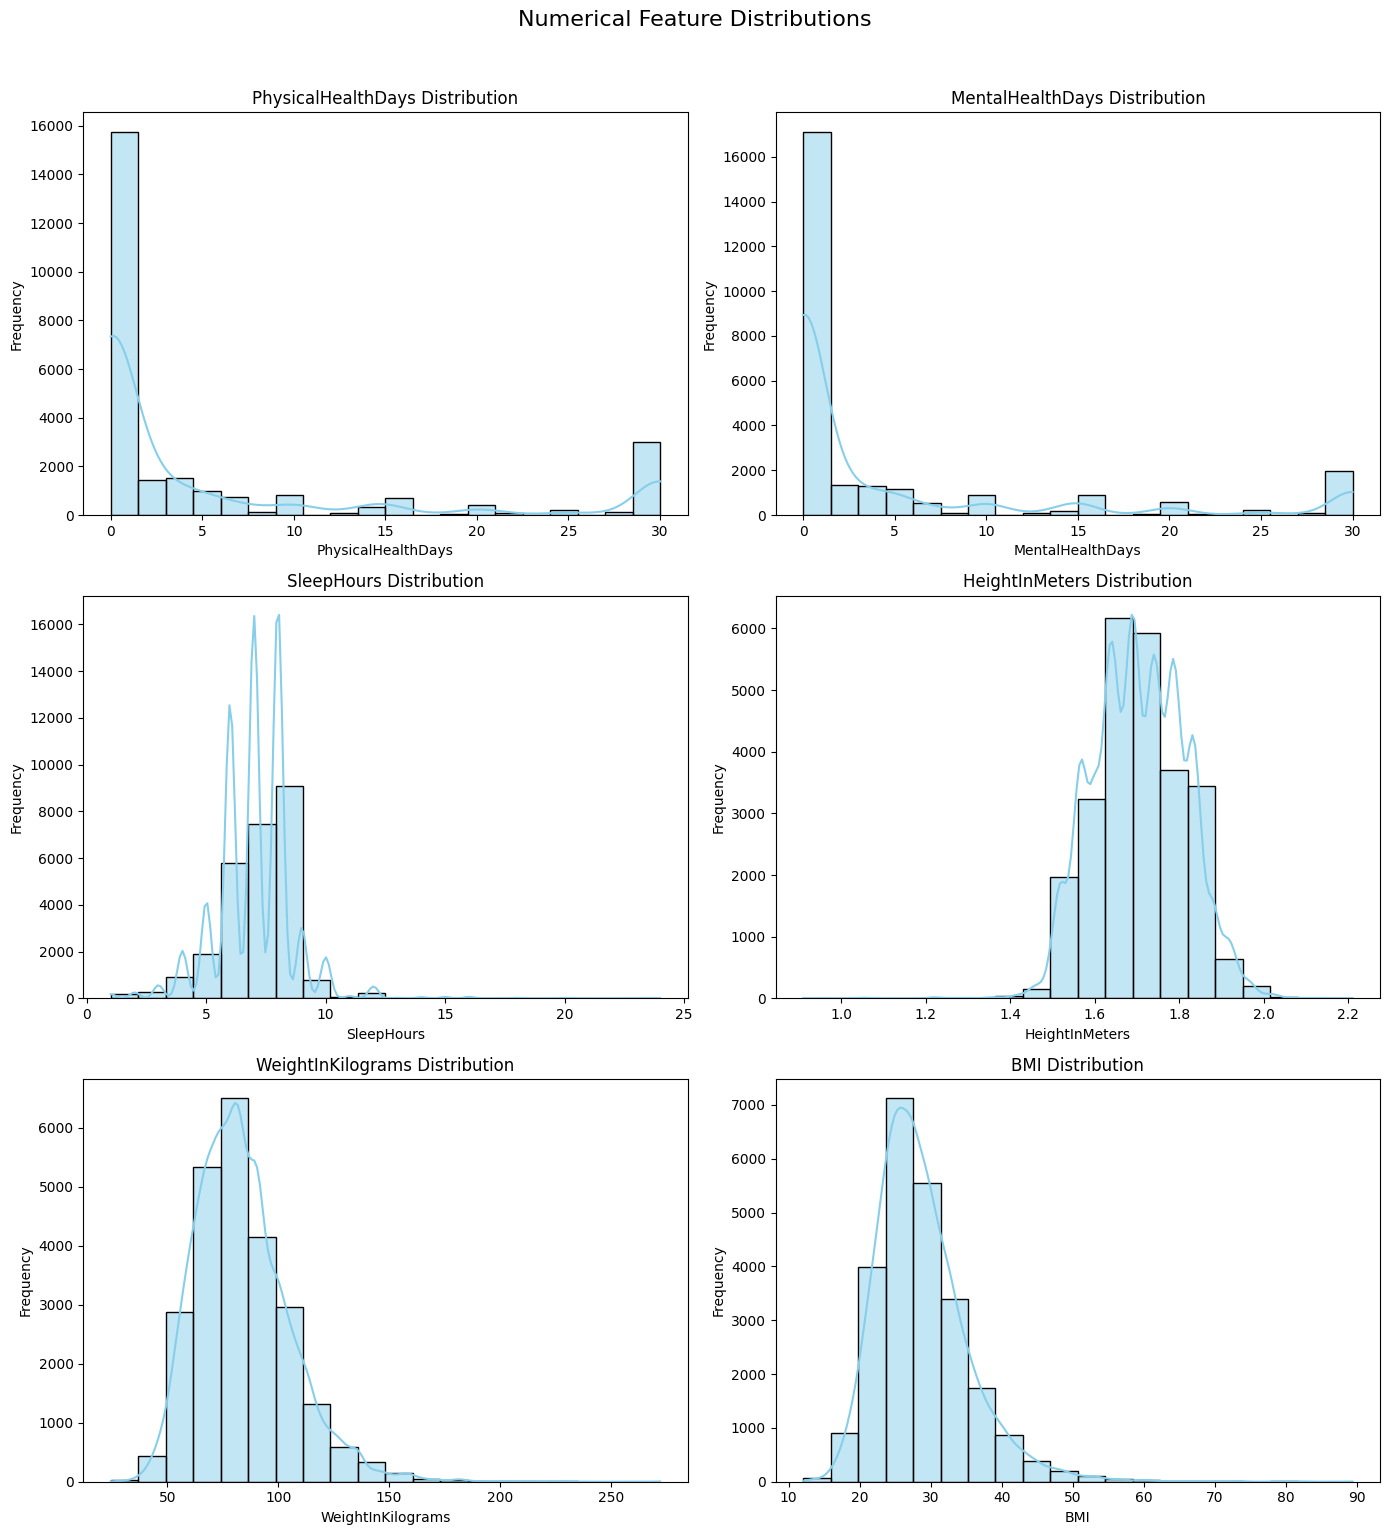

<Figure size 640x480 with 0 Axes>

In [ ]:
# 2. Histograms for Numerical Features with 'skyblue' color
num_nums = len(numerical_cols)
rows = (num_nums // 2) + (num_nums % 2 > 0)  # 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))
fig.suptitle('Numerical Feature Distributions', fontsize=16, y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(balanced_sample[col].dropna(), bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**PhysicalHealthDays and MentalHealthDays:** Both distributions are right-skewed, with most individuals reporting low numbers of days with health issues. A small peak at 30 days in both features suggests some people experience prolonged health challenges.

**SleepHours:**This follows a roughly normal distribution, peaking around the recommended 7–8 hours of sleep. Outliers show some individuals sleep very little or a lot more.

**HeightInMeters and WeightInKilograms:** Both show relatively normal distributions. Height centers around 1.6–1.8 meters, while weight peaks at 60–80 kilograms, with a spread in higher ranges indicating diversity.

**BMI:** The BMI distribution is right-skewed, peaking in the normal range (20–30), with fewer individuals in higher BMI ranges, highlighting cases of obesity in the dataset.

##3. Heart Attack by Gender

**Bar chart showing the number of samples that had a heart attack based on their gender**

based on the barchart the number of male that had heart attack is slightly larger than the number of females


Text(0, 0.5, 'Frequency')

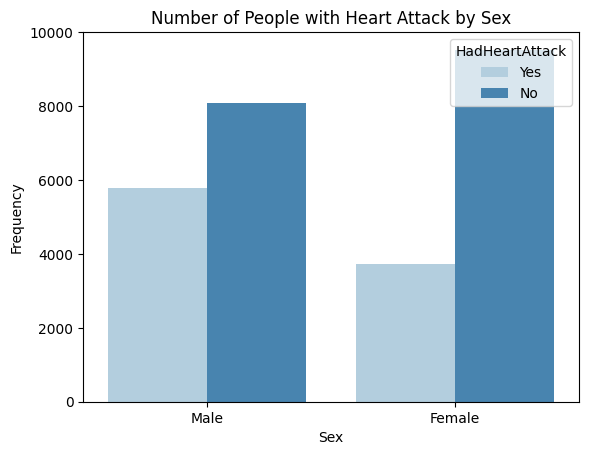

In [ ]:
sns.countplot(x='Sex', hue='HadHeartAttack', data=balanced_sample , palette="Blues")
plt.title("Number of People with Heart Attack by Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")


##4. Age Category Histogram (Heart Attack Occurrence)


**Histogram: Distribution of AgeCategory with respect to HadHeartAttack**

The histogram shows that heart attack occurrences increase with age, with the highest counts found
in age groups 70 to 74 and 65 to 69. While younger groups (ages 18 to 34) show very few heart attacks,
the proportion of heart attack cases grows significantly in older groups, particularly those aged 70 and above.
This suggests a strong correlation between age and heart attack risk, with older individuals being more susceptible.

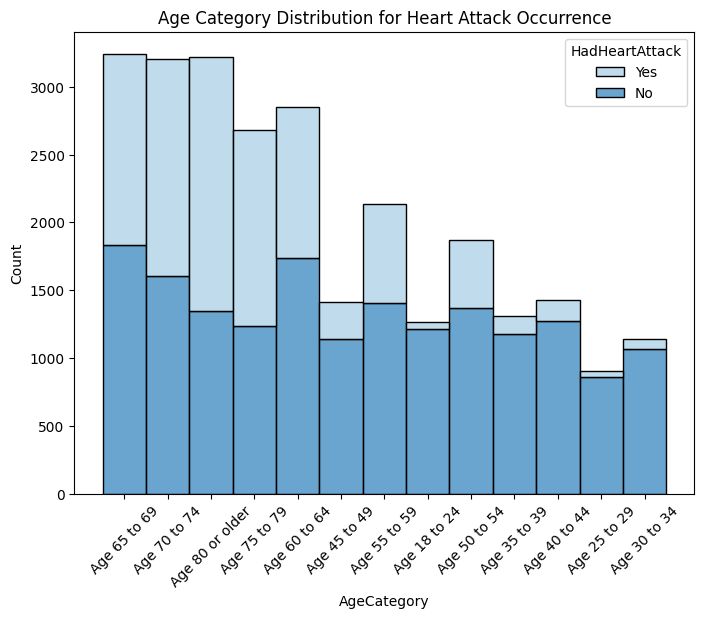

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=balanced_sample, x='AgeCategory', hue='HadHeartAttack', multiple='stack', palette='Blues')
plt.title('Age Category Distribution for Heart Attack Occurrence')
plt.xticks(rotation=45)
plt.show()


##5. Box plot: SleepHours by Heart Attack Status




This box plot compares the distribution of sleep hours between individuals who had a heart attack and those who did not.
The median and interquartile ranges (IQR) are very similar for both groups, indicating comparable central tendencies and
spread of sleep hours. There are multiple outliers in both groups, but no significant difference between the two. Overall,
the data suggests that sleep hours do not differ greatly between those who experienced a heart attack and those who did not.

Text(0, 0.5, 'Sleep Hours')

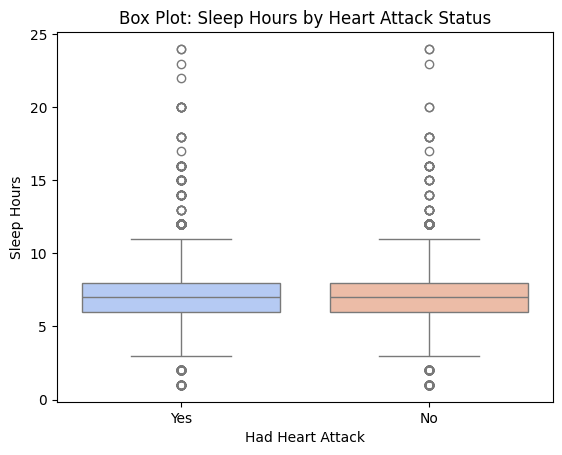

In [ ]:
sns.boxplot(x='HadHeartAttack', y='SleepHours', data=balanced_sample, palette="coolwarm")
plt.title("Box Plot: Sleep Hours by Heart Attack Status")
plt.xlabel("Had Heart Attack")
plt.ylabel("Sleep Hours")


##6. Scatter Plot BMI and Weight

The scatter plot shows a strong positive correlation between weight and BMI, indicating that as weight increases, BMI tends to increase as well. Most data points are clustered within the weight range of 50 to 150 kilograms and BMI values between 20 and 40, suggesting that these ranges are typical for the majority of the sample population.

Additionally, there are some points with particularly high weights (up to 250 kg) and BMI values (up to 100), representing less common cases in the population. The clear separation of the data points allows for an easy visualization of the trend and distribution, making the relationship between weight and BMI readily apparent.

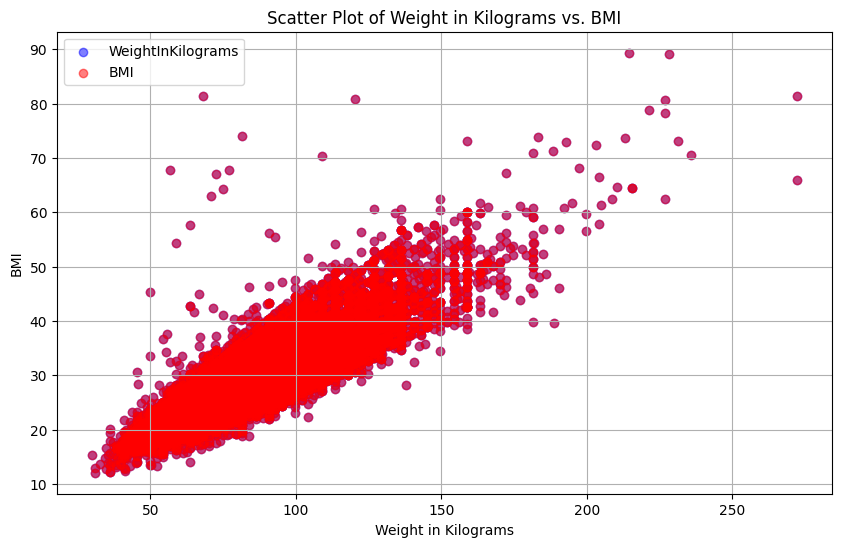

In [ ]:
balanced_sample = balanced_sample.dropna(subset=['WeightInKilograms', 'BMI'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(balanced_sample['WeightInKilograms'], balanced_sample['BMI'], c='blue', alpha=0.5, label='WeightInKilograms')
plt.scatter(balanced_sample['WeightInKilograms'], balanced_sample['BMI'], c='red', alpha=0.5, label='BMI')
plt.title('Scatter Plot of Weight in Kilograms vs. BMI')
plt.xlabel('Weight in Kilograms')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)
plt.show()


##7. Correlation Heatmap

The dataset shows logical correlations, such as those between weight and BMI or height and weight.
Mental and physical health days have a moderate relationship, suggesting a possible interplay between mental and physical well-being.
Other correlations are weak, indicating that many of these variables do not strongly influence each other.
This heatmap serves as a useful tool to identify potential variables for further analysis, particularly focusing on the strong correlations that could impact health-related outcomes.


Correlation Matrix:
                     PhysicalHealthDays  MentalHealthDays  SleepHours  \
PhysicalHealthDays            1.000000          0.343103   -0.065359   
MentalHealthDays              0.343103          1.000000   -0.122726   
SleepHours                   -0.065359         -0.122726    1.000000   
HeightInMeters               -0.032235         -0.044248    0.004282   
WeightInKilograms             0.078084          0.035583   -0.034443   
BMI                           0.108877          0.068107   -0.042471   

                    HeightInMeters  WeightInKilograms       BMI  
PhysicalHealthDays       -0.032235           0.078084  0.108877  
MentalHealthDays         -0.044248           0.035583  0.068107  
SleepHours                0.004282          -0.034443 -0.042471  
HeightInMeters            1.000000           0.480033 -0.026977  
WeightInKilograms         0.480033           1.000000  0.854514  
BMI                      -0.026977           0.854514  1.000000  


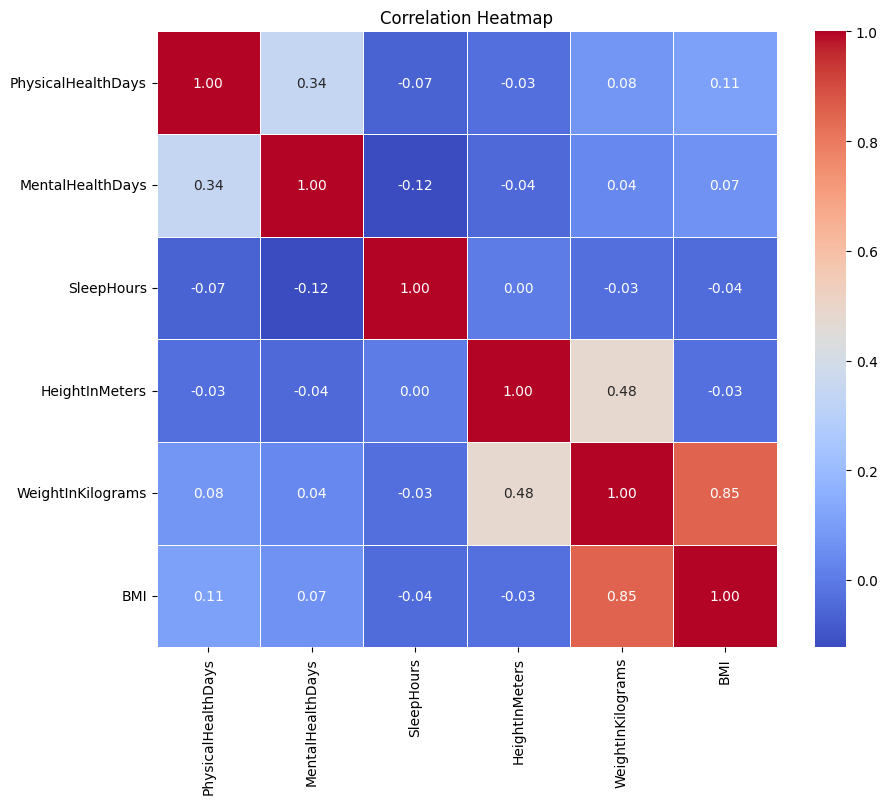

In [ ]:
# Ensure 'WeightInKilograms' and 'BMI' are numeric
balanced_sample['WeightInKilograms'] = pd.to_numeric(balanced_sample['WeightInKilograms'], errors='coerce')
balanced_sample['BMI'] = pd.to_numeric(balanced_sample['BMI'], errors='coerce')

# Select only numeric columns for the correlation matrix
numeric_columns = balanced_sample.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric crrumns
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


---
#Handling Missing Data


##Checking for Missing Values


In [ ]:
#check for missing values in the entire dataset
missing_values=balanced_sample.isna().sum()

print("Missing values in each column:")
print(missing_values)

print("\nTotal number of missing values in the dataset:", missing_values.sum())

Missing values in each column:
State                           0
Sex                             0
GeneralHealth                  69
PhysicalHealthDays            652
MentalHealthDays              551
LastCheckupTime               380
PhysicalActivities             51
SleepHours                    276
RemovedTeeth                  651
HadAngina                     530
HadStroke                      96
HadAsthma                      86
HadSkinCancer                 210
HadCOPD                       128
HadDepressiveDisorder         140
HadKidneyDisease              136
HadArthritis                  119
HadDiabetes                    58
DeafOrHardOfHearing           195
BlindOrVisionDifficulty       220
DifficultyConcentrating       361
DifficultyWalking             335
DifficultyDressingBathing     316
DifficultyErrands             405
SmokerStatus                  921
ECigaretteUsage               941
ChestScan                    2082
RaceEthnicityCategory         650
AgeCategory      

The dataset contains 25,887 missing values in total across various columns.

Some columns, such as'TetanusLast10Tdap', 'PneumoVaxEver', and 'ChestScan', have a significantly large number of missing values, while others like 'State' and 'Sex' have no missing values. This indicates a need for further preprocessing to handle these missing values.

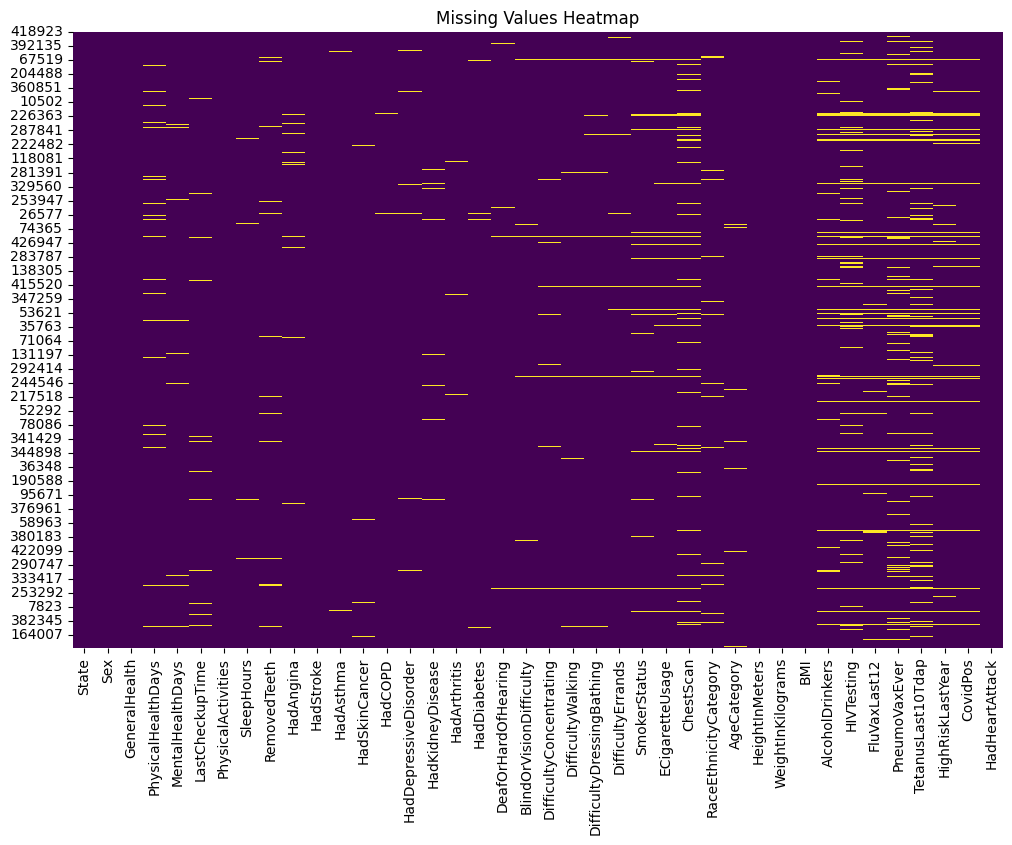

Missing values by column:
 TetanusLast10Tdap            3507
PneumoVaxEver                3007
HIVTesting                   2675
ChestScan                    2082
HighRiskLastYear             1738
CovidPos                     1737
FluVaxLast12                 1513
AlcoholDrinkers              1483
ECigaretteUsage               941
SmokerStatus                  921
PhysicalHealthDays            652
RemovedTeeth                  651
RaceEthnicityCategory         650
MentalHealthDays              551
HadAngina                     530
DifficultyErrands             405
LastCheckupTime               380
DifficultyConcentrating       361
DifficultyWalking             335
DifficultyDressingBathing     316
SleepHours                    276
AgeCategory                   249
BlindOrVisionDifficulty       220
HadSkinCancer                 210
DeafOrHardOfHearing           195
HadDepressiveDisorder         140
HadKidneyDisease              136
HadCOPD                       128
HadArthritis         

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Enable iterative imputer for MICE
from sklearn.impute import IterativeImputer

# Visualize missing data heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(balanced_sample.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Summary of missing values by column
missing_summary = balanced_sample.isnull().sum().sort_values(ascending=False)
print("Missing values by column:\n", missing_summary)

# Set a threshold for columns to drop if missing values are very high (e.g., >50%)
threshold = 0.5 * len(balanced_sample)
columns_to_drop = missing_summary[missing_summary > threshold].index
balanced_sample.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns with more than 50% missing values: {list(columns_to_drop)}")

# Define columns based on data types and importance
numeric_cols = balanced_sample.select_dtypes(include=[np.number]).columns
categorical_cols = balanced_sample.select_dtypes(include=['object']).columns

# Impute numerical data with different methods based on variance
# Impute low-variance columns with mean and high-variance columns with median
low_variance_cols = [col for col in numeric_cols if balanced_sample[col].var() < 10]
high_variance_cols = [col for col in numeric_cols if balanced_sample[col].var() >= 10]

# Mean imputation for low variance columns
mean_imputer = SimpleImputer(strategy='mean')
balanced_sample[low_variance_cols] = mean_imputer.fit_transform(balanced_sample[low_variance_cols])

# Median imputation for high variance columns
median_imputer = SimpleImputer(strategy='median')
balanced_sample[high_variance_cols] = median_imputer.fit_transform(balanced_sample[high_variance_cols])

# KNN Imputation for certain numeric columns where relationships with other variables are important
# E.g., if you want to impute based on neighbors for complex columns like 'BMI', 'WeightInKilograms'
knn_imputer = KNNImputer(n_neighbors=5)
knn_cols = ['BMI', 'WeightInKilograms']  # Define columns suitable for KNN
balanced_sample[knn_cols] = knn_imputer.fit_transform(balanced_sample[knn_cols])

# Impute categorical columns
# Use mode imputation for common categorical columns, replace with 'Unknown' for high-missing-rate columns
mode_imputer = SimpleImputer(strategy='most_frequent')
high_missing_categorical = ['LastCheckupTime', 'RemovedTeeth']
balanced_sample[high_missing_categorical] = balanced_sample[high_missing_categorical].fillna('Unknown')
balanced_sample[categorical_cols.difference(high_missing_categorical)] = mode_imputer.fit_transform(
    balanced_sample[categorical_cols.difference(high_missing_categorical)]
)

# Multiple Imputation by Chained Equations (MICE) for crucial features
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
mice_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
balanced_sample[mice_cols] = mice_imputer.fit_transform(balanced_sample[mice_cols])

# Verify remaining missing values
print("Remaining missing values by column:\n", balanced_sample.isnull().sum())

##Statistecal Summaries

The mean, median, mode, and variance have been calculated for all numeric columns in the dataset.

From the mean and median values, we can infer the central tendency of the data for each variable.

The mode shows the most frequent values, and the variance highlights how much the data is spread out from the mean.

'PhysicalHealthDays' and 'MentalHealthDays' show higher variance compared to other features, indicating more variability.

Other columns like 'SleepHours', 'HeightInMeters', and 'BMI' have lower variance, meaning the values are more consistent across records.

In [ ]:
# Select only numeric columns
numeric_balanced_sample = balanced_sample. select_dtypes (include= [np. number ])
# Calculate and display summary statistics
mean_values = numeric_balanced_sample.mean()
median_values = numeric_balanced_sample. median ()
mode_values = numeric_balanced_sample.mode().iloc[0]
variance_values = numeric_balanced_sample.var ()

print("Mean values: \n", mean_values)
print("\nMedian values: \n", median_values)
print("\nMode values: \n", mode_values)
print("\nVariance values: \n", variance_values)

Mean values: 
 PhysicalHealthDays     5.701945
MentalHealthDays       4.557707
SleepHours             7.032672
HeightInMeters         1.707236
WeightInKilograms     84.104961
BMI                   28.760705
dtype: float64

Median values: 
 PhysicalHealthDays     0.00
MentalHealthDays       0.00
SleepHours             7.00
HeightInMeters         1.70
WeightInKilograms     81.65
BMI                   27.71
dtype: float64

Mode values: 
 PhysicalHealthDays     0.00
MentalHealthDays       0.00
SleepHours             8.00
HeightInMeters         1.78
WeightInKilograms     90.72
BMI                   26.63
Name: 0, dtype: float64

Variance values: 
 PhysicalHealthDays     98.843603
MentalHealthDays       76.398825
SleepHours              2.494400
HeightInMeters          0.011677
WeightInKilograms     464.200769
BMI                    42.901960
dtype: float64


##Z-score and Outliers

Z_score:
We use **MentalHealthDays** to get the z-score. In order to determine the z-score, we first took a sample of 30% of the data and then computed the sample mean and standard deviation.as you can see.


In [ ]:
# Choose a specific column for analysis
column_name = 'MentalHealthDays'

# Check if the column exists in the DataFrame
if column_name in balanced_sample.columns:
    # Check if the column has numeric data (if applicable)
    if pd.api.types.is_numeric_dtype(balanced_sample[column_name]):


        # Randomly sample values from the chosen column
        sampled_values = balanced_sample[column_name]

        # Display the sampled values
        print("Sampled Values:")
        print(sampled_values)

        # Calculate the mean and standard deviation of the sample, ignoring NaNs
        mean = np.nanmean(sampled_values)
        std_dev = np.nanstd(sampled_values)

        # Calculate z-scores
        z_scores = (sampled_values - mean) / std_dev

        # Combine sampled values with their z-scores for display
        result_balanced_sample = pd.DataFrame({'Sample Values': sampled_values, 'Z-Scores': z_scores})

        # Detect outliers (z-score > 3)
        outliers = result_balanced_sample[result_balanced_sample['Z-Scores'].abs() > 3]

        # Display the outliers
        print("Outliers:")
        print(outliers)

    else:
        print(f"The column '{column_name}' exists but does not contain numeric data.")
else:
    print(f"The column '{column_name}' does not exist in the DataFrame.")

Sampled Values:
418923     0.0
283046     0.0
12937      0.0
95486      0.0
379670     0.0
          ... 
34786      0.0
289828    25.0
43343      0.0
308861    15.0
179459     0.0
Name: MentalHealthDays, Length: 24425, dtype: float64
Outliers:
Empty DataFrame
Columns: [Sample Values, Z-Scores]
Index: []


##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


# Identify categorical columns
categorical_columns = balanced_sample.select_dtypes(include=['object']).columns

# Apply LabelEncoder to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    balanced_sample[col] = label_encoder.fit_transform(balanced_sample[col].astype(str))

# Save the encoded data if needed
print(balanced_sample.head())


        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
418923     51    1              1                24.0               0.0   
283046     35    0              4                 0.0               0.0   
12937       2    1              4                 0.0               0.0   
95486      13    1              4                 0.0               0.0   
379670     49    0              1                30.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
418923                4                   0         6.0             2   
283046                4                   1         7.0             3   
12937                 4                   0         7.0             0   
95486                 4                   1         7.0             0   
379670                4                   0         6.0             2   

        HadAngina  ...  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
418923          1  ...       

##Normalization


Here’s the normalization, and we chose these columns to normalize for the following reasons:

- **PhysicalHealthDays & MentalHealthDays**: Their value ranges may differ, which is especially important for distance-based algorithms.
  
- **SleepHours**: Sleep hours can vary greatly, and normalization helps avoid bias in the model by treating all inputs equally.
  
- **HeightInMeters**: Height values can differ significantly and may be undervalued without normalization.

- **WeightInKilograms**: Normalization prevents weight, which can vary widely, from overshadowing smaller features, ensuring an equitable influence on outcomes.

- **BMI**: Since BMI is derived from weight and height, normalizing it helps align its scale with other features for enhanced model accuracy.

we used the min-max normalization because it preserves the relationships between data points. The normalized values maintain their relative differences.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = [
    'PhysicalHealthDays', 'MentalHealthDays', 'HeightInMeters', 'WeightInKilograms','BMI'
]
data_to_normalize = balanced_sample[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
balanced_sample[columns_to_normalize] = normalized_data_minmax
print("Min-Max scaled data:")
print(balanced_sample.head())


Min-Max scaled data:
        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
418923     51    1              1                 0.8               0.0   
283046     35    0              4                 0.0               0.0   
12937       2    1              4                 0.0               0.0   
95486      13    1              4                 0.0               0.0   
379670     49    0              1                 1.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
418923                4                   0         6.0             2   
283046                4                   1         7.0             3   
12937                 4                   0         7.0             0   
95486                 4                   1         7.0             0   
379670                4                   0         6.0             2   

        HadAngina  ...  WeightInKilograms       BMI  AlcoholDrinkers  \
418923          1

##Discretization

Discretization is the process of converting continuous numerical data into a set of discrete categories or intervals. This can make data easier to analyze and interpret by grouping similar values together. For example, instead of analyzing individual sleep hours, we can group people into broader categories of sleep duration, such as "<5 hours" or "7-8 hours."



In [ ]:
# Discretize the 'SleepHours' column by categorizing into defined ranges
# Categories: <5 hours, 5-6 hours, 7-8 hours, 9+ hours

# Define the bins and labels for discretization
sleep_bins = [0, 5, 7, 9, float('inf')]
sleep_labels = ['<5 hours', '5-6 hours', '7-8 hours', '9+ hours']

# Apply discretization to create a new categorical column
balanced_sample['SleepHours_Category'] = pd.cut(balanced_sample['SleepHours'], bins=sleep_bins, labels=sleep_labels)


# Define a mapping dictionary for the categories
sleep_hours_mapping = {
    '<5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    '9+ hours': 3
}

# Use map to encode 'SleepHours_Category'
balanced_sample['SleepHours_Category_encoded'] = balanced_sample['SleepHours_Category'].map(sleep_hours_mapping)

# Display the distribution of the new 'SleepHours_Category' column
print(balanced_sample['SleepHours_Category'].value_counts())

# Display the DataFrame to confirm the changes
print(balanced_sample[['SleepHours_Category_encoded']].head(10))





SleepHours_Category
5-6 hours    11987
7-8 hours     8434
<5 hours      2929
9+ hours      1075
Name: count, dtype: int64
       SleepHours_Category_encoded
418923                           1
283046                           1
12937                            1
95486                            1
379670                           1
214702                           1
200783                           0
389797                           2
111730                           2
298791                           1


In [ ]:
balanced_sample = balanced_sample.drop(columns=['SleepHours'])
balanced_sample = balanced_sample.drop(columns=['SleepHours_Category'])
balanced_sample = balanced_sample.rename(columns={'SleepHours_Category_encoded':'SleepHours'})

In [ ]:
class_label = balanced_sample['HadHeartAttack']
balanced_sample = balanced_sample.drop(columns=['HadHeartAttack'])
balanced_sample['HadHeartAttack'] = class_label

This code simplifies the dataset by dropping the original SleepHours and SleepHours_Category columns, leaving only the encoded SleepHours data to reduce redundancy. It then renames SleepHours_Category_encoded to SleepHours for clarity and moves the HadHeartAttack column to the end to ensure the target variable is last.

---
#Feature Selection

**Featuer selection:**

*   **Data Preprocessing:** The code prepares the dataset for analysis by ensuring all necessary numeric and categorical columns are present.

*   **Correlation Calculation:** It calculates correlation coefficients among numeric features to identify relationships, helping to spot redundant variables.



*   **Chi-Square Tests:** The code performs chi-square tests to assess the relationship between categorical variables and the outcome (HadHeartAttack), revealing significant associations.

*   **Removing Correlated Features:** Highly correlated features are identified and removed to prevent multicollinearity, which can affect model performance and interpretability.


*   **Improving Data Quality:** These steps enhance the dataset's
quality, making it cleaner and more relevant for analysis.
















In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


##Correlation Calculation


In [ ]:

#following columns are numeric
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Check if these columns exist in the DataFrame
for col in numeric_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame.")

# Calculate and print correlation coefficients
correlations = {}
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        correlation = df[col1].corr(df[col2])
        correlations[f'{col1} & {col2}'] = correlation

print("Correlation coefficients:")
for key, value in correlations.items():
    print(f"{key}: {value}")

Correlation coefficients:
PhysicalHealthDays & MentalHealthDays: 0.32134945368605417
PhysicalHealthDays & SleepHours: -0.05590583062598445
PhysicalHealthDays & HeightInMeters: -0.05086687595807942
PhysicalHealthDays & WeightInKilograms: 0.07283840982903343
PhysicalHealthDays & BMI: 0.11286486610287931
MentalHealthDays & SleepHours: -0.12907501624618947
MentalHealthDays & HeightInMeters: -0.049473154139839694
MentalHealthDays & WeightInKilograms: 0.04034541818391297
MentalHealthDays & BMI: 0.07589101481866424
SleepHours & HeightInMeters: -0.014668028946195361
SleepHours & WeightInKilograms: -0.05352128241792297
SleepHours & BMI: -0.05080531977201027
HeightInMeters & WeightInKilograms: 0.4678924271904
HeightInMeters & BMI: -0.028348528620764535
WeightInKilograms & BMI: 0.8595574121529911


##Chi-Square

In [ ]:

from scipy.stats import chi2_contingency
import pandas as pd

# Sample DataFrame (replace with your actual data)
# df = pd.read_csv('your_file.csv')

print("Column Names in DataFrame:")
print(df.columns.tolist())

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Proceed with the chi-square test after confirming the column names
categorical_columns = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

# Verify if the columns exist in the DataFrame
for column in categorical_columns:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Perform chi-square tests and store results
results = {}
features_to_remove = set()  # To track features marked for removal due to dependency

# Perform Chi-Square tests between each categorical column and 'HadHeartAttack'
for i, column in enumerate(categorical_columns):
    if column in df.columns:
        # Create the contingency table between the current categorical column and 'HadHeartAttack'
        contingency_table = pd.crosstab(df[column], df['HadHeartAttack'])

        # Perform the Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Store the results of the Chi-Square test
        results[column] = {
            'Chi-Square Statistic': chi2_stat,
            'P-Value': p_value,
            'Degrees of Freedom': dof,
            'Expected Frequencies': expected
        }

        # If the p-value is less than 0.05, the feature is dependent on 'HadHeartAttack'
        if p_value < 0.05:
            print(f"\nDependent variables detected: {column} and 'HadHeartAttack' (p-value = {p_value})")

            # To avoid removing both features, we remove only one (the one that comes later in the list)
            if column not in features_to_remove:
                # Remove the feature later in the list (the current one)
                features_to_remove.add(categorical_columns[i])  # Remove the current dependent feature

# Now, we remove the dependent categorical features identified
df_filtered = df.drop(columns=features_to_remove)

# Show the columns that were removed due to dependency
print("\nColumns identified for removal due to dependency (only categorical features):")
print(features_to_remove)

# Print the first few rows of the filtered dataframe
print("\nFiltered DataFrame after removing dependent categorical features:")
print(df_filtered.head())



Column Names in DataFrame:
['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack']

Dependent variables detected: State and 'HadHeartAttack' (p-value = 6.79759112778233e-182)

Dependent variables detected: Sex and 'HadHeartAttack' (p-value = 0.0)

Dependent variables detected: GeneralHealth and 'HadHeartAttack' (p-value = 0.0)

Dependent variabl

In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Set the threshold for correlation
correlation_threshold = 0.75

# Find highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
attributes_to_remove = set()

# Loop through all pairs of highly correlated columns
for i, j in zip(*highly_correlated_pairs):
    if i != j:
        attribute_i = df_encoded.columns[i]
        attribute_j = df_encoded.columns[j]

        # If neither of the attributes is in the removal set, add one to the removal set
        if attribute_i not in attributes_to_remove and attribute_j not in attributes_to_remove:
            attributes_to_remove.add(attribute_j)  # You can decide which one to drop, here I chose attribute_j

# Remove the highly correlated attributes
df_filtered = df_encoded.drop(columns=attributes_to_remove)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered.head())



DataFrame after removing highly correlated attributes:
   PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                 0.0               0.0         8.0             NaN   
1                 0.0               0.0         6.0            1.60   
2                 2.0               3.0         5.0            1.57   
3                 0.0               0.0         7.0            1.65   
4                 2.0               0.0         9.0            1.57   

   WeightInKilograms  State_Alaska  State_Arizona  State_Arkansas  \
0                NaN         False          False           False   
1              68.04         False          False           False   
2              63.50         False          False           False   
3              63.50         False          False           False   
4              53.98         False          False           False   

   State_California  State_Colorado  ...  HIVTesting_Yes  FluVaxLast12_Yes  \
0             False     

In [ ]:
print(attributes_to_remove)

{'BMI'}


In [ ]:
balanced_sample = balanced_sample.drop(columns=['BMI'])

In [ ]:
from sklearn.preprocessing import StandardScaler


# Define the columns to drop
columns_to_drop = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

# Drop the specified columns from the DataFrame
balanced_sample = balanced_sample.drop(columns=columns_to_drop)

# Identify numeric columns
numeric_balanced_sample = balanced_sample.select_dtypes(include=[np.number])  # Only keep numeric columns

# If you want to handle categorical columns as well, you can use:
# features = pd.get_dummies(features, drop_first=True)  # One-hot encoding for categorical columns

# Standardize the numeric features
scaler = StandardScaler()
scaled_balanced_sample = scaler.fit_transform(numeric_balanced_sample)

# Create a DataFrame for scaled features
scaled_data = pd.DataFrame(scaled_balanced_sample, columns=numeric_balanced_sample.columns)
print(scaled_data.head())

   PhysicalHealthDays  MentalHealthDays  RemovedTeeth  HeightInMeters  \
0            1.840516         -0.521449      0.182782        0.395744   
1           -0.573532         -0.521449      0.924756       -0.252053   
2           -0.573532         -0.521449     -1.301165        0.210660   
3           -0.573532         -0.521449     -1.301165        0.210660   
4            2.444028         -0.521449      0.182782        0.210660   

   WeightInKilograms  HadHeartAttack  
0           1.886065        1.343223  
1           0.201674        1.343223  
2           1.148999        1.343223  
3           0.370159        1.343223  
4          -0.703414        1.343223  


In [ ]:
print(balanced_sample)

        PhysicalHealthDays  MentalHealthDays  RemovedTeeth  HeightInMeters  \
418923            0.800000          0.000000             2        0.646154   
283046            0.000000          0.000000             3        0.592308   
12937             0.000000          0.000000             0        0.630769   
95486             0.000000          0.000000             0        0.630769   
379670            1.000000          0.000000             2        0.630769   
...                    ...               ...           ...             ...   
34786             0.000000          0.000000             3        0.646154   
289828            0.100000          0.833333             3        0.592308   
43343             0.000000          0.000000             0        0.553846   
308861            0.833333          0.500000             0        0.553846   
179459            0.000000          0.000000             0        0.723077   

        WeightInKilograms SleepHours  HadHeartAttack  
418923  

We saved the cleaned and processed dataset to a CSV file named Processed_dataset.csv. This allows us to easily access and use the prepared data

In [ ]:
balanced_sample.to_csv('Processed_dataset.csv', index=False)
